In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
style.use('default')
import matplotlib.patches as patches

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 10

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [21]:
outpath_fig = './dataFolders/Output/Figures/v2/FinalFigures/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'

In [22]:
early_color = '#E88855'
late_color = '#7BC368'
fitline_color = '#4895ff'

In [23]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

In [3]:
## draw Fig2 in its entirity

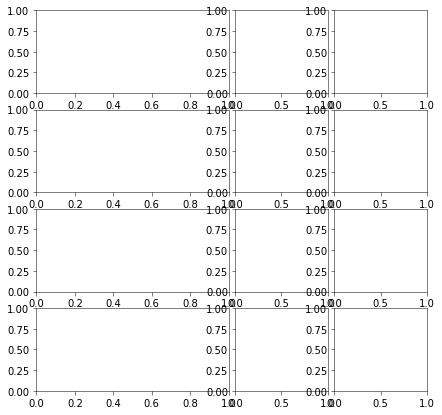

In [78]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 7 #half width = 3.5, full width = 7 
h = 7 # square-ish figure

# gridspec inside gridspec
f = plt.figure(figsize = (w,h))

gs0 = plt.GridSpec(4, 4, figure=f, wspace=0.07)

# gs00 = f.add_subplot(
# # #     gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0])

ax01 = f.add_subplot(gs0[0,0:2])
ax02 = f.add_subplot(gs0[1,0:2], sharex = ax01, sharey = ax01)
ax03 = f.add_subplot(gs0[2,0:2], sharex = ax01, sharey = ax01)
ax04 = f.add_subplot(gs0[3,0:2], sharex = ax01, sharey = ax01)

# gs01 = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs0[1], wspace=0.05)
ax100 = f.add_subplot(gs0[0,2]
                      , sharey = ax01)
ax101 = f.add_subplot(gs0[0,3], sharex = ax100, sharey = ax100)
ax110 = f.add_subplot(gs0[1,2], sharex = ax100, sharey = ax100)
ax111 = f.add_subplot(gs0[1,3], sharex = ax100, sharey = ax100)
ax120 = f.add_subplot(gs0[2,2], sharex = ax100, sharey = ax100)
ax121 = f.add_subplot(gs0[2,3], sharex = ax100, sharey = ax100)
ax130 = f.add_subplot(gs0[3,2], sharex = ax100, sharey = ax100)
ax131 = f.add_subplot(gs0[3,3], sharex = ax100, sharey = ax100)

In [79]:
# do the fit for three different y0 - computed assuming the slope = 0 for 1/2 of the data
shapes = ['c-1', 'c-2','c-3', 'c-10']
aa = [ax01, ax02, ax03, ax04]

for floralShape, axes in zip(shapes, aa):
    
    axes.cla()
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    
    numMoth = len(new_df.name.unique())
    numSuccVisits = len(ydata_notnan)
    
    param_file = glob.glob(outpath + floralShape + '_FittedParameters.csv')
    param_df = pd.read_csv(param_file[0])
    
    idx = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
    a0 = param_df.loc[idx,'alpha']
    mean_y0 = param_df.loc[idx, 'y_intercept']
    tau = param_df.loc[idx, 'tau']
    
    # plot the final curve fit
    max_trial=max(xdata_notnan)
    axes.plot(xdata, ydata/100, 'ok', 
              markersize=3, 
              markerfacecolor = '#808080',
              markeredgewidth = 0.5,
              alpha = 0.5)
    axes.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
             '-', 
              color = fitline_color, 
              linewidth=1)
          
    axes.set_xlim([-3,65])
    axes.set_ylim([0,60])
#     axes.text(45,np.log(30), 'n = ' + str(numSuccVisits))
    axes.patch.set_alpha(0)

In [80]:
# add emblishments
for ax in aa[:-1]:
    ax.spines['bottom'].set_position(('outward', 5))  # outward by 10 points
    plt.setp(ax.get_xticklabels(), visible=False)    
    
for ax in aa:
    ax.set_yticks([0, 20, 40, 60])
    ax.tick_params(direction = 'out', axis='both')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 5))  # outward by 10 points

    
ax04.set_xticks([0, 20, 40, 60])
ax04.spines['bottom'].set_position(('outward', 5))  # outward by 10 points
ax03.set_ylabel('Exploration Time (second)')
ax04.set_xlabel('Visit Number')

y0, ymax = axes.get_ylim()
for i,axes in enumerate(aa):
    temp1 = patches.Rectangle((-0.5,y0),3.5,ymax-y0, edgecolor=None, facecolor=early_color, alpha = 0.3)
    axes.add_patch(temp1)
    temp2 = patches.Rectangle((18.5,y0),10.5,ymax-y0, edgecolor=None, facecolor=late_color, alpha = 0.3)
    axes.add_patch(temp2)

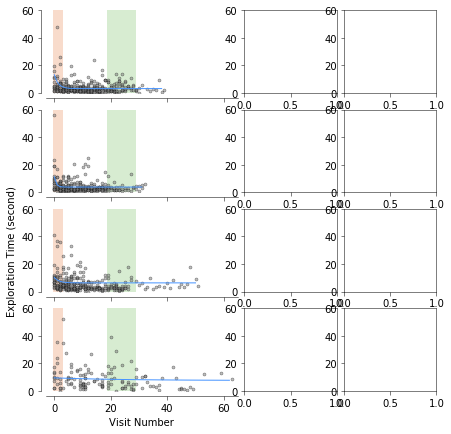

In [81]:
f

In [82]:
path = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters_v2/'
early_pde = pd.read_csv(path + 'first3bins.csv')
late_pde = pd.read_csv(path + '20To30bin.csv')
earlyData = pd.read_csv(path + 'first3bins_data.csv')
lateData = pd.read_csv(path + '20To30bin_data.csv')

In [83]:
flower = ['c-1', 'c-2', 'c-3', 'c-10']
cc_early = ['#fecc5c',  '#fd8d3c', '#e31a1c', '#983720']
cc_late = ['#c3de99', '#7ac479', '#31a353', '#016937']

In [84]:
e_shape = ax100
l_shape = ax101

shape_compare = [ax120, ax121, ax130, ax131]

flower = ['c-1', 'c-2', 'c-3', 'c-10']

offset = -0.005
for ii, ff in enumerate(flower):
    bins = early_pde['Unnamed: 0']
    binsize = bins[1]-bins[0]
    e_value = early_pde[ff]
    e_cumulative = np.cumsum(e_value*binsize)
    e_data = earlyData[earlyData['flower'] == ff]['DiscoveryTime']/100 
    
    ax100.plot(e_value, bins, color = cc_early[ii])
    ax100.plot([-0.002 + offset]*len(e_data), e_data  
             , '_', color = cc_early[ii]
            , markersize = 2
             , mew = 0.1)
    
#     ax100.plot(bins, e_cumulative ,color = cc_early[ii])
    
    ax100.patch.set_facecolor(early_color)
    ax100.patch.set_alpha(0.15)
    
    
    l_value = late_pde[ff]
    l_cumulative = np.cumsum(l_value*binsize)
    l_data = lateData[lateData['flower'] == ff]['DiscoveryTime']/100 
    
    ax101.plot(l_value, bins, color = cc_late[ii])
    ax101.plot([-0.002 + offset]*len(l_data), l_data  
            , '_', color = cc_late[ii]
            , markersize = 2
             , mew = 0.1)
    
#     ax101.plot(bins, l_cumulative ,color = cc_late[ii])
    
    ax101.patch.set_facecolor(late_color)
    ax101.patch.set_alpha(0.15)
    
    shape_compare[ii].plot(e_value, bins, color = cc_early[ii])
    shape_compare[ii].plot(l_value, bins, color = cc_late[ii])
    
#     shape_compare[ii].plot(bins, e_cumulative, color = cc_early[ii])
#     shape_compare[ii].plot(bins, l_cumulative, color = cc_late[ii])
    
    offset-=0.005
    ii+=1

In [88]:
for ax in [ax100, ax101, ax120, ax121, ax130, ax131]:
    ax.spines['bottom'].set_position(('outward', 5))  # outward by 10 points
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(direction = 'out', axis='both')

# for ax in [ax100, ax101, ax120, ax121, ax130, ax131]:
#     ax.spines['bottom'].set_position(('outward', 5))  # outward by 10 points
#     ax.tick_params(direction = 'out', axis='both')
    
for ax in [ax100, ax101, ax120, ax121]:
    plt.setp(ax.get_xticklabels(), visible=False)

# for ax in [ax101, ax121, ax131]:
#     plt.setp(ax.get_yticklabels(), visible=False)

for ax in [ax130, ax131]:
    ax.set_xlabel('Probability Density')
    
# ax130.set_xlabel('Exploration Time (second)')
# ax130.set_ylabel('Cummative Probability')
    
# f.delaxes(ax110)
# f.delaxes(ax111)

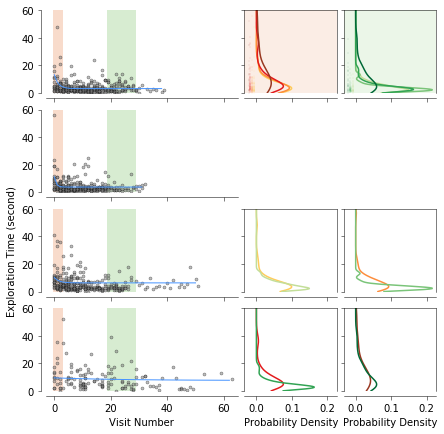

In [89]:
f

In [91]:
f.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/Learning_PDE.pdf")

In [ ]:
# early_axes = [ax100, ax110, ax120, ax130]
# late_axes =  [ax101, ax111, ax121, ax131]
# l = zip(eary_axes, late_axes)

e_shape = ax100
l_shape = ax101

shape_compare = [ax120, ax121, ax130, ax131]

flower = ['c-1', 'c-2', 'c-3', 'c-10']

offset = -0.025
for shape, (aa0, aa1) in zip(flower, zip(early_axes, late_axes)):
                             
    aa0.cla()
    aa1.cla()
    e_data = earlyData[earlyData['flower'] == shape]['DiscoveryTime']/100 
    e_pd  = early_pde[shape]
    bins = late_pde['Unnamed: 0']
    binsize = bins[1]-bins[0]
    e_cum = np.cumsum(e_pd * binsize)
                             
    l_data = lateData[lateData['flower'] == shape]['DiscoveryTime']/100
    l_pd  = late_pde[shape]
    l_cum = np.cumsum(l_pd * binsize)
                             
    aa0.plot(bins, e_cum, linewidth = 1, color = early_color)
    aa0.plot(e_data ,[0.25 + offset]*len(e_data),  '_', color = 'k', mew = 0.1)
    aa0.patch.set_facecolor(early_color)
    aa0.patch.set_alpha(0.3)
#     aa0.set_ylim(aa0.get_ylim()[::-1])
    
    aa1.plot(bins,l_cum, linewidth = 1, color = late_color)
    aa1.plot(l_data ,[0.25 + offset]*len(l_data),  '_', color = 'k', mew = 0.1)
    aa1.set_facecolor(late_color)
    aa1.patch.set_facecolor(late_color)
    aa1.patch.set_alpha(0.3)
#     aa1.set_ylim(aa1.get_ylim()[::-1])  

# ax100.set_xlim(0,.25)
for ax in early_axes[:-1] + late_axes[:-1]:
    ax.tick_params(direction = 'out', axis='both')
    plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)

for ax in [early_axes[-1], late_axes[-1]]:
    ax.tick_params(direction = 'out', axis='both')
#     plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xlabel('Exploration Time (second)')
    
for ax in late_axes:
    plt.setp(ax.get_xticklabels(), visible=False)

# early_axes[2].set_ylabel('Cummulative Probability Function')

In [ ]:
f1, ax = plt.subplots(1,2, figsize = (w,w*1/2), sharex = True, sharey = True)
ax = ax.ravel()

offset = -0.005
for ii, ff in enumerate(flower):
    bins = early_pde['Unnamed: 0']
    binsize = bins[1]-bins[0]
    e_value = early_pde[ff]
    e_cumulative = np.cumsum(value*binsize)
    e_data = earlyData[earlyData['flower'] == ff]['DiscoveryTime']/100 
    
    ax[0].plot(bins, e_value, label = ff, color = cc_early[ii])
    ax[0].plot(e_data ,[-0.002 + offset]*len(e_data),  
             '|', color = cc_early[ii]
            , markersize = 2
             , mew = 0.1)
    
    
    l_value = late_pde[ff]
    l_cumulative = np.cumsum(value*binsize)
    l_data = lateData[lateData['flower'] == ff]['DiscoveryTime']/100 
    
    plt.plot(bins, l_value, label = ff, color = cc_late[ii])
    plt.plot(l_data ,[-0.002 + offset]*len(l_data),  
             '|', color = cc_late[ii]
            , markersize = 2
             , mew = 0.1)
    
    
    
    offset-=0.005

# plt.legend()
plt.xlabel('Exploration Time (second)')
ax[0].set_ylabel('Probability Density')
plt.suptitle('PDE')
f1.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/FlowerVisit_PDE.pdf")

In [ ]:
ax_list = f1.axes
ylim = ax_list[0].get_ylim()

In [ ]:
f2 = plt.figure(figsize = (w,w*1/2))

offset = -0.005
for ii, ff in enumerate(flower):
    bins = late_pde['Unnamed: 0']
    binsize = bins[1]-bins[0]
    value = late_pde[ff]
    cumulative = np.cumsum(value*binsize)
    l_data = lateData[lateData['flower'] == ff]['DiscoveryTime']/100 
    
    plt.plot(bins, value, label = ff, color = cc_late[ii])
    plt.plot(e_data ,[-0.002 + offset]*len(e_data),  
             '|', color = cc_late[ii]
            , markersize = 2
             , mew = 0.1)
    offset-=0.005
    
    
plt.legend()
plt.xlabel('Exploration Time (second)')
plt.ylabel('Cummulative Probability')
plt.title('Late Visits')
f2.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/LateVisit_PDE.pdf")

In [ ]:
f3, axtest = plt.subplots(2,2, figsize = (w,w), sharex = True, sharey = True)
axtest = axtest.ravel()

for ii, ff in enumerate(flower):
    bins = late_pde['Unnamed: 0']
    binsize = bins[1]-bins[0]
    e_value = early_pde[ff]
    l_value = late_pde[ff]
    
    e_cum= np.cumsum(e_value*binsize)
    l_cum = np.cumsum(l_value*binsize)
    
    axtest[ii].plot(bins, e_value, label = ff, color = cc_early[ii])
    axtest[ii].plot(bins, l_value, color = cc_late[ii])
    axtest[ii].legend()
    
axtest[2].set_xlabel('Exploration Time (second)')
axtest[2].set_ylabel('Cummulative Probability')
plt.suptitle('Early/Late Visits')


axtest[2].set_ylim(ylim)
for ax in axtest[0:2]:
    plt.setp(ax.get_xticklabels(), visible=False)
for ax in [axtest[1], axtest[3]]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
f3.savefig(r"./dataFolders/Output/Figures/v2/FinalFigures/Early-LateVisit_PDE.pdf")

In [ ]:
f

In [ ]:
f.savefig('./dataFolders/Output/Figures/v2/testColorScheme/' + 'LearningLogAndCumulative.pdf')